# Sales & Marketing Trends EDA
**Project:** Portfolio Data Analyst Project  
**Author:** Shivan Maharaj  
**Date:** 2025/08/11  
**Objective:** Analyze sales dataset to answer 5 business questions and prepare cleaned data for Tableau visualization.

## Table of Contents
1. Import Libraries
2. Load Dataset
3. Data Cleaning
4. Exploratory Data Analysis (EDA)
5. Export Cleaned Data for Tableau

## Business questions to be explored during Exploratory Data Analysis

1. What are the monthly sales trends over the past year?
2. What's the Average Order Value (AOV) over time, and has it increased during campaigns?
3. Which campaigns delivered the highest ROI?
4. Are certain acquisition channels (Meta, Google, Influencer, etc.) more cost-effective?
5. Are there repeat buyers, and how do they behave differently?                      

# 1. Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.ticker as mtick

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import matplotlib.cm as cm

import numpy as np

# Imports the various libraries and assigns them their corresponding aliases.

# 2. Load Datasets

In [2]:
campaigns = pd.read_csv(r"C:\Users\Student\Desktop\Shivan\Portfolio Projects\Project 1 - Ubuntu Organics\Data\Clean data\campaigns.csv", sep = ";") 

customers = pd.read_csv(r"C:\Users\Student\Desktop\Shivan\Portfolio Projects\Project 1 - Ubuntu Organics\Data\\Clean data\customers.csv", sep = ";") 

orders = pd.read_csv(r"C:\Users\Student\Desktop\Shivan\Portfolio Projects\Project 1 - Ubuntu Organics\Data\\Clean data\orders.csv", sep = ";") 

products = pd.read_csv(r"C:\Users\Student\Desktop\Shivan\Portfolio Projects\Project 1 - Ubuntu Organics\Data\\Clean data\products.csv", sep = ";") 

# Imports the four datasets and assigns them their corresponding aliases.

# 3. Data Cleaning

In [3]:
customers['signup_date'] = customers['signup_date'].str.strip()
# Deletes leading and trailing white spaces

customers['signup_date'] = pd.to_datetime(customers['signup_date'], errors='raise')
# Converts the 'signup_date' column to the datetime data type

customers.dtypes
# Displays the data types of the customers table

customer_id                    object
name                           object
signup_date            datetime64[ns]
region                         object
acquisition_channel            object
dtype: object

In [4]:
orders = orders.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)
# Removes all leading and trailing white spaces in the orders table if the column data type is an object.

money_cols = ['product_cost', 'selling_price', 'total_cost', 'total_sale', 'total_profit']
# Creates a variable called 'money_cols' 
for col in money_cols: # Opens the loop for the following functions
    orders[col] = orders[col].str.replace("R", "", regex=False) # Deletes the 'R' from all money_cols
    orders[col] = orders[col].str.replace(" ", "", regex=False) # Deletes all white spaces from all money_cols
    orders[col] = orders[col].str.replace(",", "", regex=False) # Deletes the ',' from all money_cols

In [5]:
orders[money_cols] = orders[money_cols].apply(pd.to_numeric, errors='coerce') 
# Converts the money_cols columns into numerics

In [6]:
orders[money_cols] = orders[money_cols].astype('float64') / 100 # Converts the data type to float64 and divides it by 100

In [7]:
orders['quantity'] = (
    orders['quantity']
    .str.replace(",00", "", regex=False) # Deletes the ',00' from the quantity column
    .str.strip() # Deletes leading and trailing white spaces
)

orders['quantity'] = pd.to_numeric(orders['quantity'], errors='coerce') # Converts the data type into a numeric

In [8]:
orders['order_date'] = orders['order_date'].str.strip() # Deletes all leading and trailing white spaces

In [9]:
orders['order_date'] = pd.to_datetime(orders['order_date'], errors = 'raise') 
# Converts the 'order_date' column into the datetime data type

In [10]:
orders.dtypes # Checking that the change was made

order_id                 object
order_date       datetime64[ns]
customer_id              object
product_id               object
product_name             object
product_cost            float64
quantity                  int64
selling_price           float64
total_cost              float64
total_sale              float64
total_profit            float64
campaign_id              object
dtype: object

In [11]:
orders['campaign_id'] = orders['campaign_id'].fillna('Organic') 
# Fills all missing values in the campaign_id column with 'Organic'

In [12]:
campaigns['start_date'] = campaigns['start_date'].str.strip() # Deletes all leading and trailing white spaces

In [13]:
campaigns['start_date'] = pd.to_datetime(campaigns['start_date'], errors='coerce') # Converts the data type to datetime

In [14]:
campaigns['end_date'] = pd.to_datetime(campaigns['end_date'], errors='raise') # Converts the data type to datetime

In [15]:
campaigns['budget'] = (
    campaigns['budget']
    .str.replace("R", "", regex = False)  # Deletes the R
    .str.replace(" ", "", regex = False)  # Deletes white spaces
    .str.replace(",", ".", regex = False) # Replaces the ',' with '.'
)

In [16]:
campaigns['budget'] = campaigns['budget'].astype('Float64')  # Converts the data type to Float

In [17]:
campaigns.dtypes # Verifying that the changes were made

campaign_id              object
campaign_name            object
start_date       datetime64[ns]
end_date         datetime64[ns]
channel                  object
budget                  Float64
dtype: object

In [18]:
products['selling_price'] = (
    products['selling_price']
    .str.replace("R", "", regex=False)  # Deletes the R
    .str.replace(",", ".", regex=False) # Deletes white spaces
    .str.replace(" ", "", regex=False)  # Replaces the ',' with '.'
)

In [19]:
products['selling_price'] = products['selling_price'].astype('Float64') # Converts the data type to Float

In [20]:
products['product_cost'] = (
    products['product_cost']
    .str.replace("R", "", regex=False)  # Deletes the R
    .str.replace(",", ".", regex=False) # Deletes white spaces
    .str.replace(" ", "", regex=False)  # Replaces the ',' with '.'
)

In [21]:
products['product_cost'] = products['product_cost'].astype('Float64') # Converts the data type to Float

In [22]:
products.dtypes # Checking that the changes were made

product_id        object
product_name      object
category          object
selling_price    Float64
product_cost     Float64
launch_date       object
dtype: object

In [23]:
products['launch_date'] = products['launch_date'].str.strip() # Deletes all leading and trailing white spaces

In [24]:
products['launch_date'] = pd.to_datetime(products['launch_date'], errors = 'coerce') # Converts the data type to datetime

In [25]:
money_cols = ['selling_price', 'product_cost', 'return_amount', 'lost_profit'] # Creates a variable called money_cols

# 4. Exploratory Data Analysis (EDA)

## Business questions to be explored during Exploratory Data Analysis

1. What are the monthly sales trends over the past year?
2. What's the Average Order Value (AOV) over time, and has it increased during campaigns?
3. Which campaigns delivered the highest ROI?
4. Are certain acquisition channels (Meta, Google, Influencer, etc.) more cost-effective?
5. Are there repeat buyers, and how do they behave differently?               

# 1. What are the monthly sales trends over the past year?

In [26]:
orders['order_month'] = orders['order_date'].dt.to_period('M') 
# Creates a new column called order_month with the period data type

In [27]:
monthly_sales = (                         # Creates a new column called 'monthly_sales'
    orders                                # Making changes to the orders table
    .groupby('order_month')['total_sale'] # Groups by 'order_month' and 'total_sale'
    .sum()                                # Sums the data in the 'total_sale' column based on the 'order_month'
    .reset_index()                        # Resets the index number of the columns for proper referencing
)

In [28]:
monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp() # Converts the datatype to timestamp

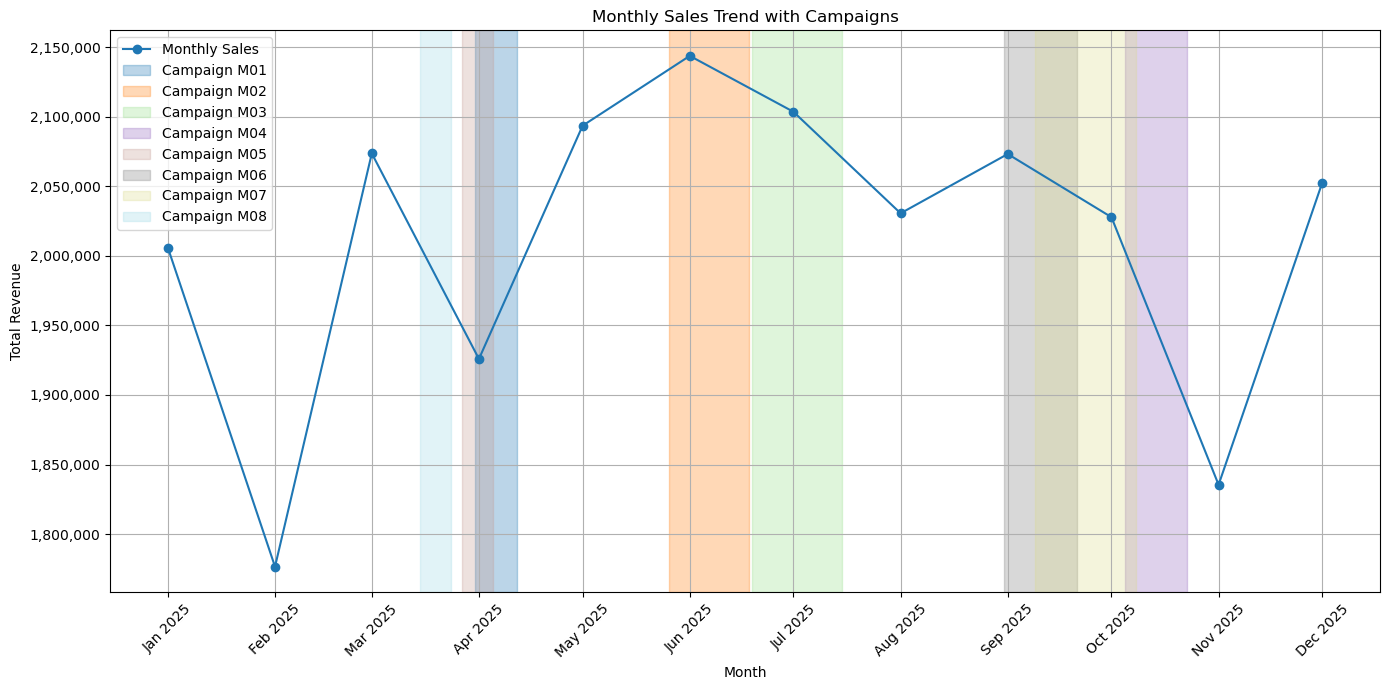

In [29]:
plt.figure(figsize=(14, 7)) # The size of the canvas
plt.plot(monthly_sales['order_month'], monthly_sales['total_sale'], marker='o', label='Monthly Sales')
# Adds the 'order_month' and 'total_sale' values to the table, marks datapoints with an o, labels the legend with 'Monthly Sales'
plt.title('Monthly Sales Trend with Campaigns') # Creates the title
plt.xlabel('Month') # Labels the X-axis
plt.ylabel('Total Revenue') # Labels the Y-axis
plt.grid(True) # Adds a grid
plt.xticks(rotation=45) # Rotates the x-axis labels by 45 degrees for easy reading

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
# Labels the Y-axis with commas as thousand separators
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # Adds tick markers to every month (the o)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Formats the x-axis with the month & year

num_campaigns = len(campaigns) # Counts how many rows are in the campaigns table for the below line of code
colors = plt.colormaps.get_cmap('tab20').resampled(num_campaigns)  # Creates different colors for each campaign

for i, row in campaigns.iterrows():
    plt.axvspan(
        row['start_date'],
        row['end_date'],
        color=colors(i),  
        alpha=0.3,
        label=f"Campaign {row['campaign_id']}" if f"Campaign {row['campaign_id']}" not in plt.gca().get_legend_handles_labels()[1] else None
    ) 
# Loops through each campaign and assigns them a unique color

handles, labels = plt.gca().get_legend_handles_labels() # Gets the labels for the legend used in the chart
by_label = dict(zip(labels, handles)) # Removes duplicates
plt.legend(by_label.values(), by_label.keys(), loc='upper left') # Rebuilds the legend in the upper left area of the chart
# Above removes duplicate entries in the legend

plt.tight_layout() # Ensures the chart is spaced correctly
plt.show() # Renders the chart

## What are the monthly sales trends over the past year?

1. **January**: Solid sales performance, potentially driven by New Year's fitness resolutions. This could indicate strong alignment between product positioning and seasonal health goals.

2. **February**: Significant dip in sales, likely reflecting the post-holiday consumer fatigue and tightened discretionary spending after December splurges.

3. **March–April**: Sales remain flat or slightly depressed, suggesting a slow recovery period. No major school holidays or campaigns active here, so demand may be organic and low.

4. **May–June**: Noticeable rise in sales aligns with mid-year school holidays. This pattern could point to increased family or youth purchases during time off, or better campaign alignment.

5. **July–August**: Gradual decline likely reflects return to routine and school/work schedules. No notable campaigns or holidays appear to counteract this dip.

6. **September**: Spike in sales coincides with the third-term school holiday. This further strengthens the hypothesis that school break periods drive consumer activity.

7. **October–November**: Sales decline again, likely from post-holiday normalization. The lack of major campaigns during this window could also contribute to the softness.

8. **December**: As expected, sales rebound sharply in line with the holiday season, consistent with gifting and year-end consumer spending.

### Key Insight:
Sales appear to follow a **cyclical pattern** strongly tied to **school holiday calendars** and **year-end behavior**. Campaign activity appears to amplify these trends (to be verified in later analysis), but seasonality seems to be the primary driver. 

This insight could inform better campaign timing and inventory planning.

# 2. What's the Average Order Value (AOV) over time, and has it increased during campaigns?

In [30]:
def plot_monthly_metric(df, campaigns_df, value_column, title, y_label): # Creates a new function
    
    plt.figure(figsize=(14, 7)) # Sets the canvas size
    plt.plot(df['order_month'], df[value_column], marker='o', label=title) # Defines what will be plotted

    plt.title(title) # Assisgns the title variable to the title
    plt.xlabel('Month') # Assigns the month label to the X-axis
    plt.ylabel(y_label) # Assigns the y-label variable to the y-axis label
    plt.grid(True) # Adds a grid
    plt.xticks(rotation=45) # Rotates the X-axis labels by 45 degrees

    plt.gca().yaxis.set_major_formatter(
        mtick.FuncFormatter(lambda x, _: f'{int(x):,}') # Labels the Y-axis with commas as thousand separators

    )

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # Adds tick markers to every month (the o)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Formats the x-axis with the month & year

    num_campaigns = len(campaigns_df) # Counts how many rows are in the campaigns table for the below line of code
    colors = plt.colormaps.get_cmap('tab20').resampled(num_campaigns) # Creates different colors for each campaign

    for i, row in campaigns_df.iterrows():
        plt.axvspan(
            row['start_date'],
            row['end_date'],
            color=colors(i),
            alpha=0.3,
            label=f"Campaign {row['campaign_id']}"
            if f"Campaign {row['campaign_id']}" not in plt.gca().get_legend_handles_labels()[1]
            else None
        )
    # Loops through each campaign and assigns them a unique color
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper left')
    # Removes duplicates from the legend and adds it to the top left corner of the chart
    
    plt.tight_layout() # Ensures the chart is spaced correctly
    plt.show() # Renders the chart

In [31]:
monthly_orders = ( # Creates a new column called 'monthly_orders'
    orders # We're pulling from the orders dataframe
    .groupby('order_month')['total_sale'] # Grouping by order_month and working with the total_sale column
    .count() # Counts the total sales
    .reset_index(name = 'order_count') # Resets column index numbers and labels it 'order_count'
)

In [32]:
monthly_orders['order_month'] = monthly_orders['order_month'].dt.to_timestamp() # Converts the datatype to timestamp

In [33]:
aov_df = monthly_sales.merge(monthly_orders, on='order_month')
# Creates a new dataframe called aov_df by merging the monthly_sales df with the monthly_orders df using the order_month column

In [34]:
aov_df # Prints the aov_df dataframe

,order_month,total_sale,order_count
0,2025-01-01,2005831.74,717
1,2025-02-01,1776595.95,644
2,2025-03-01,2073592.94,715
3,2025-04-01,1925892.04,681
4,2025-05-01,2093530.26,715
5,2025-06-01,2143699.54,726
6,2025-07-01,2103505.44,715
7,2025-08-01,2030548.04,734
8,2025-09-01,2073165.57,734
9,2025-10-01,2027782.78,744


In [35]:
aov_df['average_order_value'] = aov_df['total_sale'] / aov_df['order_count']
# Creates a column called 'average_order_value' by dividing the total sale value by the order count value

In [36]:
aov_df['average_order_value'] = aov_df['average_order_value'].round(2)
# Rounds it off to 2 decimal places

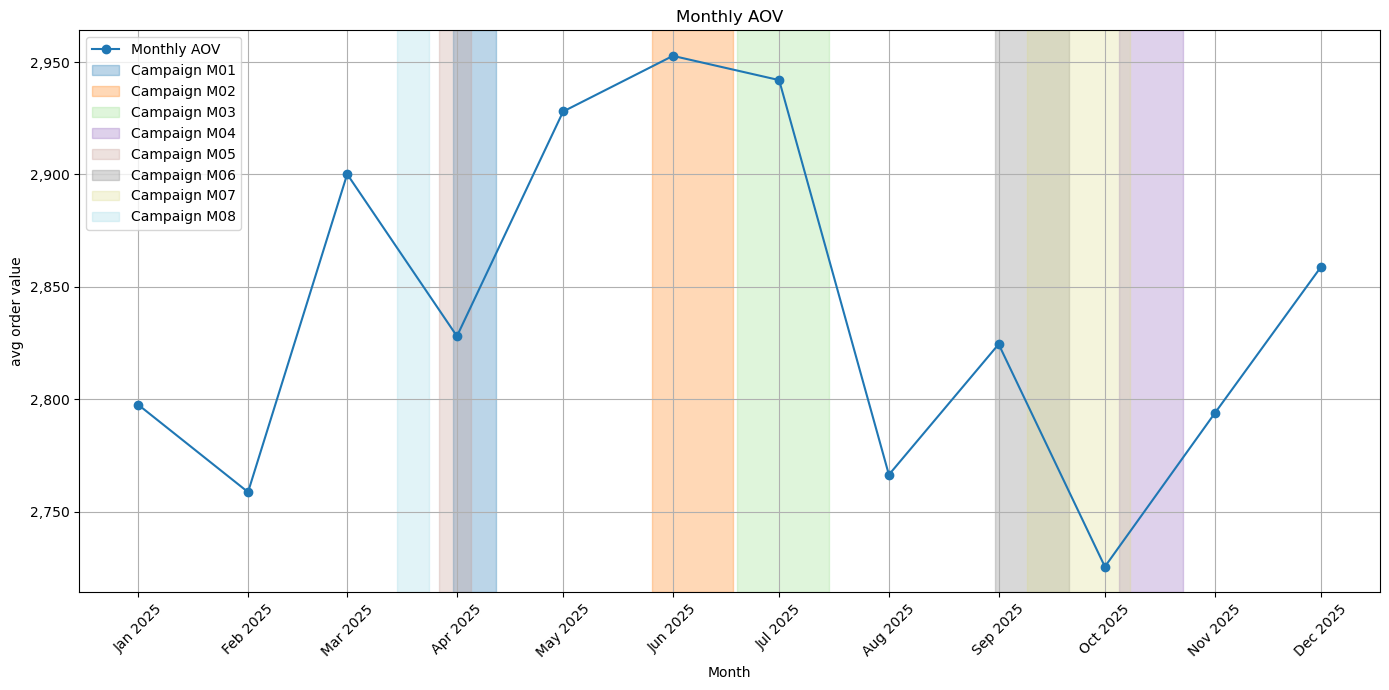

In [37]:
plot_monthly_metric( # Plots the new graph using our custom function
    aov_df, # Uses the aov_df dataframe for values
    campaigns, # Uses the campaigns dataframe
    'average_order_value', # Uses the 'average_order_value' column for values
    'Monthly AOV', # Assigns the title 'Monthly AOV'
    'avg order value') # Assigns 'avg order value' to the X-axis label 

# Question 2: What's the Average Order Value (AOV) over time, and has it increased during campaigns?

1. Based on the monthly AOV data plotted alongside campaign periods, there is no strong evidence that campaigns significantly increase AOV. 

2. AOV seems to be strongly correlated to school holiday calenders and year-end behaviour, which corresponds with our findings during our inquiry into monthly sales trends. 

**Key recommendation:** Structure campaigns around school holidays and year-end shopping and time them to drive sales through those periods. This will capitalize on already established consumer behaviour to increase sales.

# 3. Which campaigns delivered the highest ROI?

In [38]:
campaign_revenue = (                           # Creates a new dataframe calles 'campaign_revenue'
    orders                                     # Working with the orders dataframe
    .groupby('campaign_id')['total_sale']      # Groups by campaign_id and working with the 'total_sale' column
    .sum()                                     # Sums the 'total_sale' column for each campaign ID
    .reset_index(name='total_campaign_revenue')# Resets the column index numbers and labels the new column 'total_campaign_revenue'
)

In [39]:
campaigns_roi = campaigns.merge(campaign_revenue, on='campaign_id', how='left') 
# Left joins the 'campaigns_roi' and 'campaigns' dataframes on the 'campaign_id' column

In [40]:
campaigns_roi['ROI'] = campaigns_roi['total_campaign_revenue'] / campaigns_roi['budget']
# Creates a new column in the 'campaigns_roi' dataframe that calculates the ROI by dividing the revenue by the budget

In [41]:
campaigns_roi.sort_values(by='ROI', ascending=False, inplace=True) # Sorts the values by ROI in descending order

In [42]:
campaigns_roi['ROI'] = campaigns_roi['ROI'].round(0) # Rounds the number to 0 decimal places

In [43]:
campaigns_roi['ROI'] = campaigns_roi['ROI'].map('{:.0f}%'.format) # Expresses the value as a percentage

In [44]:
campaigns_roi # Displays the dataframe

,campaign_id,campaign_name,start_date,end_date,channel,budget,total_campaign_revenue,ROI
7,M08,Iterate Innovative Roi,2025-03-15,2025-03-24,Meta,9207.52,1874508.29,204%
2,M03,Strategize Interactive Communities,2025-06-19,2025-07-15,Referral,16358.82,1784933.82,109%
6,M07,Extend Real-Time E-Markets,2025-09-09,2025-10-08,Google,18498.86,2011836.52,109%
5,M06,Incentivize Real-Time Technologies,2025-08-31,2025-09-21,Referral,15944.36,1728255.90,108%
1,M02,Aggregate Transparent Schemas,2025-05-26,2025-06-18,Google,15843.6,1688364.77,107%
3,M04,Extend Integrated Architectures,2025-10-05,2025-10-23,Influencer,40772.13,1683858.52,41%
4,M05,Morph Strategic E-Commerce,2025-03-27,2025-04-05,Influencer,48168.4,1865115.16,39%
0,M01,Generate Clicks-And-Mortar Schemas,2025-03-31,2025-04-12,Meta,46312.2,1745283.18,38%


# Question 3: Which campaigns delivered the highest ROI?

1. Campaign M08 generated the highest ROI by far with 204%, significantly outperforming all others.
2. Campaigns M03 and M07 tied for second place with 109% ROI each.
3. Campaign M06 ranked third with 108% ROI.

**Key Insight:** Campaign M08's exceptional performance warrants a deep dive. Investigate the strategies, channels, timing, and messaging used in M08. Replicate its successful elements in upcoming campaigns, but monitor results closely to confirm causality. If improvements aren't sustained, further analysis will be needed to identify additional factors.

# 4. Are certain acquisition channels (Meta, Google, Influencer, etc.) more cost-effective?

In [45]:
channel_cer = (                             # Creates a new dataframe called 'channel_cer'
    campaigns_roi                           # Working with the 'campaigns_roi' dataframe
    .groupby('channel')                     # Groups by the channel column
    .agg({'budget': 'sum',                  # Sums the 'budget' column
          'total_campaign_revenue': 'sum'}) # Sums the 'total_campaign_revenue' column
    .reset_index()                          # Resets the column index numbers
)

In [46]:
channel_cer['CER'] = channel_cer['budget'] / channel_cer['total_campaign_revenue']
# Creates a new column called 'CER' by dividing the budget by the revenue
channel_cer['CER'] = channel_cer['CER'].round(2)
# Rounds the value to 2 decimal places

In [47]:
channel_cer['ROI'] = ((channel_cer['total_campaign_revenue'] - channel_cer['budget']) 
                       / channel_cer['budget']) * 100
# Creates a new column called 'ROI' in the 'channel_cer' dataframe by subtracting the budget from the revenue then dividing 
# it by the budget and multiplying it by 100
channel_cer['ROI'] = channel_cer['ROI'].round(0).astype(int).astype(str) + '%'
# Rounds it to 0 decimal places, converts it to an int datatype to remove '.0', converts it to a string, and adds a % sign

In [48]:
channel_cer.sort_values(by='ROI', ascending=False, inplace=True)
# Sorts values by ROI in descending order

In [49]:
channel_cer.dtypes # Shows the datatypes

channel                    object
budget                    Float64
total_campaign_revenue    float64
CER                       Float64
ROI                        object
dtype: object

In [50]:
channel_cer['ROI'] = channel_cer['ROI'].str.replace('%', '', regex=False).astype(float)
channel_cer.sort_values(by='ROI', ascending=False, inplace=True)
channel_cer['ROI'] = channel_cer['ROI'].map('{:.0f}%'.format)
# Converts the ROI column in the 'channel_cer' dataframe to a float and expresses it as a percentage

In [51]:
channel_cer # Displays the 'channel_cer' dataframe

,channel,budget,total_campaign_revenue,CER,ROI
3,Referral,32303.18,3513189.72,0.01,10776%
0,Google,34342.46,3700201.29,0.01,10674%
2,Meta,55519.72,3619791.47,0.02,6420%
1,Influencer,88940.53,3548973.68,0.03,3890%


# Question 4: Are certain acquisition channels (Meta, Google, Influencer, etc.) more cost-effective?

1. Referrals slightly outperform Google in cost-effectiveness, with ROIs of 10 776% and 10 674% respectively.
2. Meta ranks third at 6 420%, and Influencers come last at 3 890%.

Here, cost-effectiveness is measured using the Cost-Effectiveness Ratio (CER) — total revenue generated by a channel divided by the total budget invested in it — expressed as ROI %. This shows how many units of revenue were earned for every unit of spend.

**Key Insights:** Referrals and Google are the most cost-effective acquisition channels, with a negligible difference between them. However, as noted in Question 3, one Meta campaign delivered an exceptional ROI far above its peers.

**I recommend:**

First, attempt to replicate the conditions of that high-performing Meta campaign.

If replication fails, shift budget allocation toward Referrals and Google.

If replication succeeds, rerun this analysis before making budget adjustments to ensure Meta's improved performance is consistent.

# 5. Are there repeat buyers, and how do they behave differently?     

In [52]:
customer_order_counts = ( # Creates a new dataframe called 'customer_order_counts'
    orders # Working with the orders dataframe
    .groupby('customer_id')['order_id'] # Grouping by the 'customer_id' column and working on the 'order_id' column
    .count() # Counting the number of values in the 'order_id' column
    .reset_index(name='order_count') # Resets column index numbers and labels the new column 'order_count'
)

customer_order_counts['is_repeat'] = customer_order_counts['order_count'] > 1 #
# Creates a new boolean column called 'is_repeat' that is true for customers with an order count that is greater than 1

In [53]:
customer_spend = ( # Creates a new dataframe called 'customer_spend'
    orders # Working with the orders dataframe
    .groupby('customer_id')['total_sale'] # Grouping by the 'customer_id' column and working on the 'total_sale' column
    .sum() # Sums the values in the 'total_sale' column
    .reset_index(name='total_spent') # Resets the column index numbers and names the new column 'total_spent'
)

repeat_buyer_df = customer_order_counts.merge(customer_spend, on='customer_id')
# Creates a new dataframe by merging the 'customer_order_counts' dataframe with the 'customer_spend' dataframe

In [54]:
customer_spend = ( # Updates the 'customer_spend' dataframe
    orders # Working with the orders table
    .groupby('customer_id')['total_sale'] # Groups by 'customer_id' and working with the 'total_sale' columns
    .sum() # Sums the values in the 'total_sale' column
    .reset_index(name='total_spent') # Resets the column index numbers and names the new column 'total_spent'
)

repeat_buyer_df = customer_order_counts.merge(customer_spend, on='customer_id')
# Creates a new dataframe by merging the 'customer_order_counts' dataframe with the 'customer_spend' dataframe

In [55]:
repeat_customers = repeat_buyer_df[repeat_buyer_df['is_repeat']]
# Creates a new dataframe containing only customers who are repeat buyers (is_repeat == True)

one_time_customers = repeat_buyer_df[~repeat_buyer_df['is_repeat']]
# Creates a new dataframe containing only customers who made a single purchase (is_repeat == False)

In [56]:
customer_metrics = ( # Creates a new dataframe called customer_metrics
    orders # Working with the 'orders' dataframe
    .groupby('customer_id') # Grouping by the 'customer_id' column
    .agg( # Doing the following aggregations
        total_spent=('total_sale', 'sum'), # Summing the total sales
        order_count=('order_id', 'nunique'), # Counting the non-unique orders
        campaign_orders=('campaign_id', lambda x: x.notna().sum() - (x == 'Organic').sum()) 
        # Counts orders attributed to campaigns that aren't organic or missing   
    )
    .reset_index() # Resets the column index number
)

customer_metrics['AOV'] = customer_metrics['total_spent'] / customer_metrics['order_count'] 
# Creates a new column called 'AOV' by dividing the total spend by the order count

customer_metrics['campaign_attribution'] = (customer_metrics['campaign_orders'] / customer_metrics['order_count'])*100
# Creates a new column called 'campaign_attribution' by dividing the orders by the count of orders attributed to campaigns
# and multiplying it by 100

In [57]:
customer_metrics['AOV'] = customer_metrics['AOV'].round(2) # Rounds the value to 2 decimal places

In [58]:
customer_metrics['is_repeat'] = customer_metrics['order_count'] > 1
# Creates a new boolean column called 'is_repeat' that is true for customers with an order count that is greater than 1
repeat_customers = customer_metrics[customer_metrics['is_repeat']] 
# Creates a new dataframe using the customers whose 'is_repeat' boolean is TRUE
one_time_customers = customer_metrics[~customer_metrics['is_repeat']]
# Creates a new dataframe using the customers whose 'is_repeat' boolean is FALSE

In [59]:
summary = pd.DataFrame({ # Creates a new dataframe called summary
    'AOV': [ # Creates a new column called 'AOV'
        repeat_customers['AOV'].mean().round(2), # Uses values from the repeat_customers dataframe rounded to 2 decimal places 
        one_time_customers['AOV'].mean().round(2) # Uses values from the one_time_customers dataframe rounded to 2 decimal places
    ],
    'campaign_attribution': [ # Creates a new column called 'AOV'
        repeat_customers['campaign_attribution'].mean().round(2), 
        # Uses values from the repeat_customers dataframe rounded to 2 decimal places
        one_time_customers['campaign_attribution'].mean().round(2) 
        # Uses values from the one_time_customers dataframe rounded to 2 decimal places
    ]
}, index=['Repeat Buyers', 'One-time Buyers']) # Resets the index numbers and labels them appropriately

# Question 5. Are there repeat buyers, and how do they behave differently?

## Average Order Value

1. The Average Order Value of repeat buyers is approximately 4x higher than that of one-time buyers
2. This could be attributed to a variety of factors, such as greater disposable income, greater interest in our niche, etc

**Recommendation:** Investigate customer demographic data to find similarities within the repeat buyer group and differences from the one-time-buyer group. Currently available data provides no demographic information. Recommend working with marketing and data engineering teams to obtain such data.

## Campaign Attribution

1. 60% of repeat buyers have purchases attributed to campaigns compared to only 20% for one-time buyers.
2. This implies that campaigns are much more effective at engaging repeat buyers and driving sales.

**Recommendation:** Develop campaigns to nurture repeat buyers since they bring in more revenue per order and are more campaign-responsive.


# 5. Export Cleaned Data for Tableau


In [60]:
campaigns.to_csv("campaigns.csv", index=False)

orders.to_csv("orders.csv", index=False)

customers.to_csv("customers.csv", index=False)

products.to_csv("products.csv", index=False)

monthly_sales.to_csv("monthly_sales.csv", index=False)

campaigns_roi.to_csv("campaigns_roi.csv", index=False)

monthly_sales.to_csv("monthly_sales.csv", index=False)

aov_df.to_csv("aov_df.csv", index=False)

channel_cer.to_csv("channel_cer.csv", index=False)

summary.to_csv("summary_df.csv", index=False)

# Exports the above dataframes as CSVs

In [31]:
products.dtypes

product_id               object
product_name             object
category                 object
selling_price           Float64
product_cost            Float64
launch_date      datetime64[ns]
dtype: object

In [32]:
orders.dtypes

order_id                 object
order_date       datetime64[ns]
customer_id              object
product_id               object
product_name             object
product_cost            float64
quantity                  int64
selling_price           float64
total_cost              float64
total_sale              float64
total_profit            float64
campaign_id              object
order_month           period[M]
dtype: object

In [33]:
campaigns.dtypes

campaign_id              object
campaign_name            object
start_date       datetime64[ns]
end_date         datetime64[ns]
channel                  object
budget                  Float64
dtype: object

In [34]:
customers.dtypes

customer_id                    object
name                           object
signup_date            datetime64[ns]
region                         object
acquisition_channel            object
dtype: object